#GDrive Connect

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


#Import Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import normaltest,shapiro,ks_1samp,mannwhitneyu
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

#Import Dataset

In [3]:
df_mn = pd.read_csv("/content/gdrive/MyDrive/PROJECT/Particle Size Eka/Mn_Results.csv").drop(columns=" ")
df_std = pd.read_csv("/content/gdrive/MyDrive/PROJECT/Particle Size Eka/Results.csv",).drop(columns=" ")

In [4]:
df_std=df_std[["Area","Perim.","Circ.","Round","Solidity","Width","Height"]]
df_mn=df_mn[["Area","Perim.","Circ.","Round","Solidity","Width","Height"]]

#Dataset Info

In [5]:
df_mn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      174 non-null    float64
 1   Perim.    174 non-null    float64
 2   Circ.     174 non-null    float64
 3   Round     174 non-null    float64
 4   Solidity  174 non-null    float64
 5   Width     174 non-null    float64
 6   Height    174 non-null    float64
dtypes: float64(7)
memory usage: 9.6 KB


In [6]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      106 non-null    float64
 1   Perim.    106 non-null    float64
 2   Circ.     106 non-null    float64
 3   Round     106 non-null    float64
 4   Solidity  106 non-null    float64
 5   Width     106 non-null    float64
 6   Height    106 non-null    float64
dtypes: float64(7)
memory usage: 5.9 KB


#Descriptive

In [7]:
df_std.describe()

,Area,Perim.,Circ.,Round,Solidity,Width,Height
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,149.078651,56.189651,0.464887,0.496774,0.690028,14.537660,12.595151
std,516.237449,84.830595,0.217273,0.182329,0.124845,18.446577,11.997120
min,10.416000,11.632000,0.056000,0.140000,0.387000,2.795000,2.795000
25%,19.530250,23.491000,0.279750,0.369000,0.597500,6.522000,6.522000
50%,40.363000,34.624000,0.446500,0.501500,0.700000,9.317000,9.317000
75%,74.216000,50.948000,0.627750,0.611000,0.782750,14.674000,13.043000
max,4834.883000,650.050000,0.972000,0.918000,0.917000,145.342000,78.261000


In [8]:
df_mn.describe()

,Area,Perim.,Circ.,Round,Solidity,Width,Height
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,60.446856,35.579310,0.579575,0.608276,0.804333,8.357029,8.162236
std,114.273951,45.457109,0.253870,0.188647,0.109627,8.899519,8.537618
min,0.421000,2.228000,0.060000,0.191000,0.390000,0.562000,0.562000
25%,3.402000,7.715000,0.377500,0.477250,0.736500,2.293750,2.247000
50%,16.271500,20.089000,0.567000,0.615000,0.831000,5.431000,5.618000
75%,59.020750,48.599750,0.786250,0.732750,0.889000,11.563250,10.814250
max,984.023000,327.475000,1.000000,0.976000,0.966000,61.798000,53.184000


#Data Cleaning

##Drop High Particles Size

In [9]:
df_std=df_std[df_std["Area"]<500]

In [10]:
df_mn=df_mn[df_mn["Area"]<500]

##Data Size Adjusment

In [11]:
df_mn = df_mn.sample(n=len(df_std["Area"]),random_state=42).reset_index(drop=True)

In [12]:
df_mn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      101 non-null    float64
 1   Perim.    101 non-null    float64
 2   Circ.     101 non-null    float64
 3   Round     101 non-null    float64
 4   Solidity  101 non-null    float64
 5   Width     101 non-null    float64
 6   Height    101 non-null    float64
dtypes: float64(7)
memory usage: 5.6 KB


##Add Categories

In [13]:
df_std["Type"]="Standard"
df_mn["Type"]="Mn"

<ipython-input-13-743189b26e29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_std["Type"]="Standard"


#Final Dataframe


In [14]:
df=pd.concat([df_mn,df_std])
df

,Area,Perim.,Circ.,Round,Solidity,Width,Height,Type
0,0.982,3.726,0.889,0.518,0.949,0.749,1.498,Mn
1,0.491,2.493,0.993,0.791,0.848,0.749,0.936,Mn
2,67.893,57.997,0.254,0.629,0.712,13.109,9.738,Mn
3,60.914,35.082,0.622,0.416,0.909,5.993,13.109,Mn
4,0.526,2.603,0.976,0.718,0.882,0.749,0.936,Mn
...,...,...,...,...,...,...,...,...
101,47.741,31.170,0.617,0.400,0.791,11.180,9.317,Standard
102,36.457,23.264,0.846,0.868,0.884,6.522,7.453,Standard
103,12.152,15.039,0.675,0.653,0.737,3.727,5.590,Standard
104,50.345,28.535,0.777,0.520,0.866,11.180,7.453,Standard


#Exploratory Data Analysis

##Area

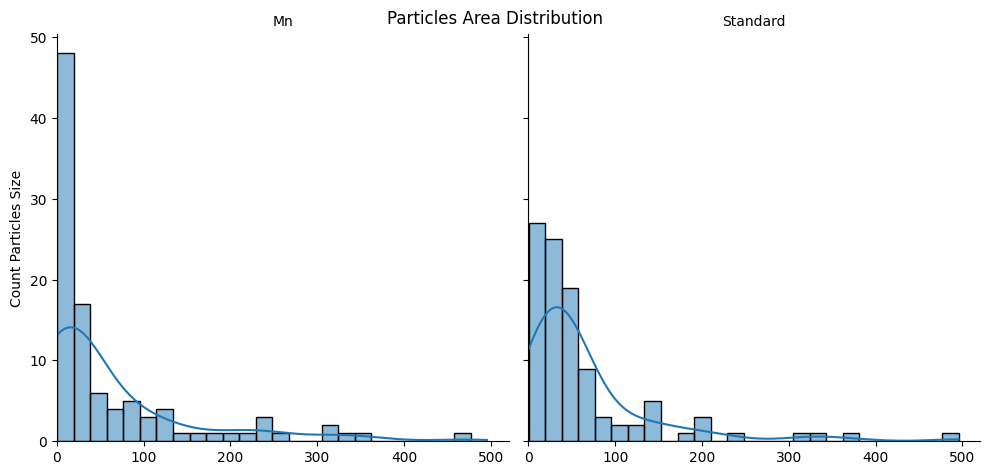

In [15]:
g=sns.displot(
    data=df,
    x="Area",
    # log_scale=True,
    col="Type",
    # kind="bar"
    kde=True,
)
g.set_axis_labels("", "Count Particles Size")
# g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name}")
g.set(xlim=(0))
g.figure.suptitle("Particles Area Distribution")
plt.show()

##Perimeter

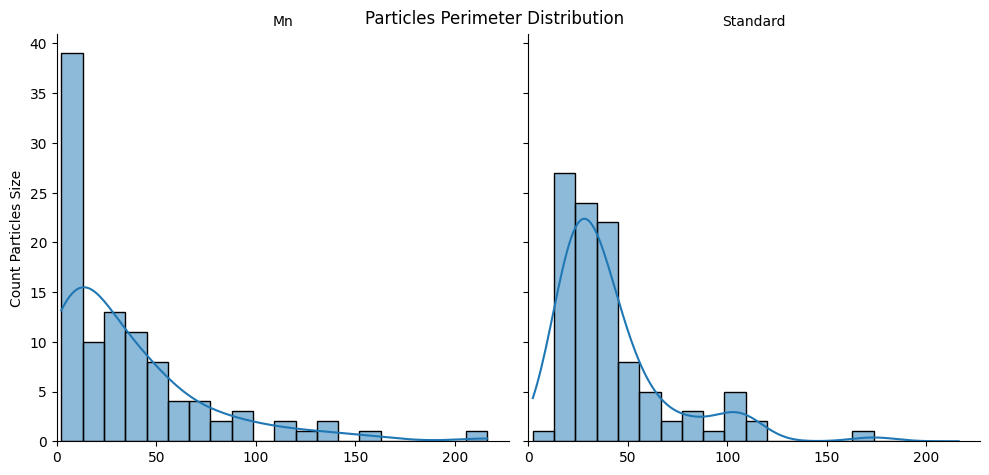

In [16]:
g=sns.displot(
    data=df,
    x="Perim.",
    # log_scale=True,
    col="Type",
    # kind="bar"
    kde=True,
)
g.set_axis_labels("", "Count Particles Size")
# g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name}")
g.set(xlim=(0))
g.figure.suptitle("Particles Perimeter Distribution")
plt.show()

##Circularity

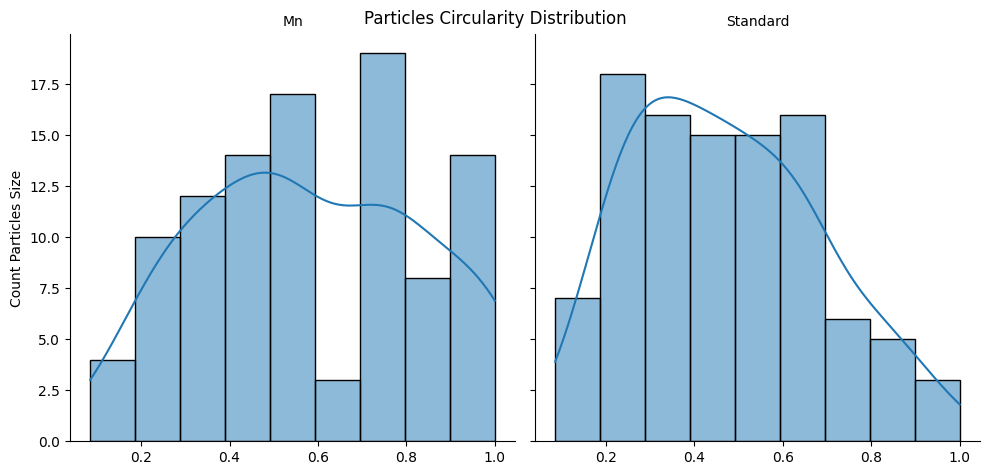

In [17]:
g=sns.displot(
    data=df,
    x="Circ.",
    # log_scale=True,
    col="Type",
    # kind="bar"
    kde=True,
)
g.set_axis_labels("", "Count Particles Size")
# g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name}")
# g.set(xlim=(0))
g.figure.suptitle("Particles Circularity Distribution")
plt.show()

##Roundness

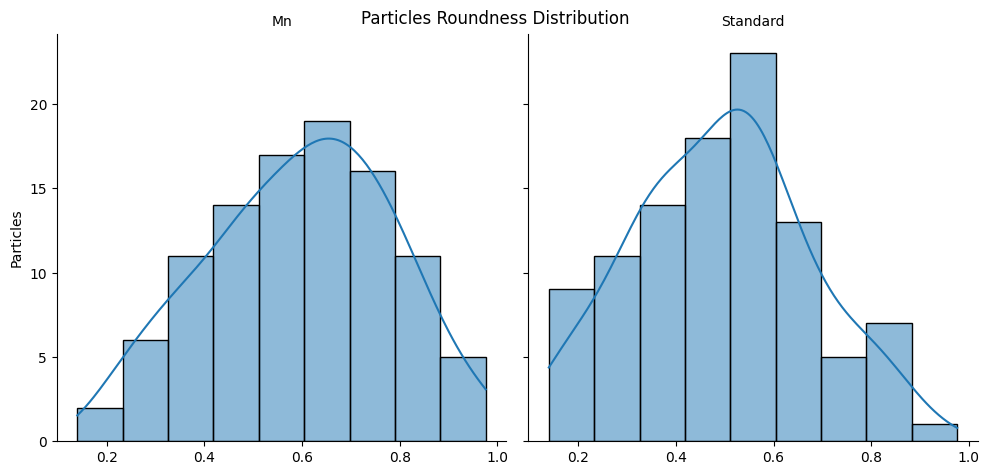

In [58]:
g=sns.displot(
    data=df,
    x="Round",
    # log_scale=True,
    col="Type",
    # kind="bar"
    kde=True,
)
g.set_axis_labels("", "Particles")
# g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name}")
# g.set(xlim=(0))
g.figure.suptitle("Particles Roundness Distribution")
plt.show()

##Solidity

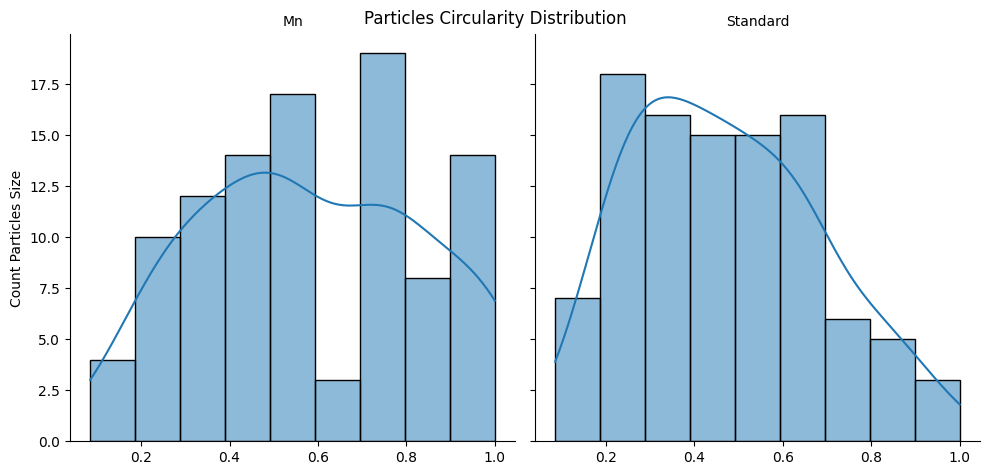

In [19]:
g=sns.displot(
    data=df,
    x="Circ.",
    # log_scale=True,
    col="Type",
    # kind="bar"
    kde=True,
)
g.set_axis_labels("", "Count Particles Size")
# g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name}")
# g.set(xlim=(0))
g.figure.suptitle("Particles Circularity Distribution")
plt.show()

##Width

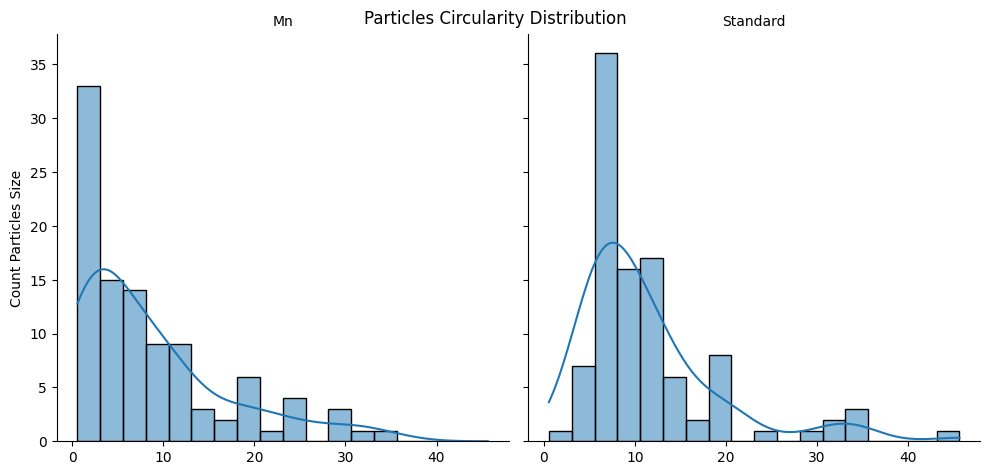

In [20]:
g=sns.displot(
    data=df,
    x="Width",
    # log_scale=True,
    col="Type",
    # kind="bar"
    kde=True,
)
g.set_axis_labels("", "Count Particles Size")
# g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name}")
# g.set(xlim=(0))
g.figure.suptitle("Particles Circularity Distribution")
plt.show()

##Height

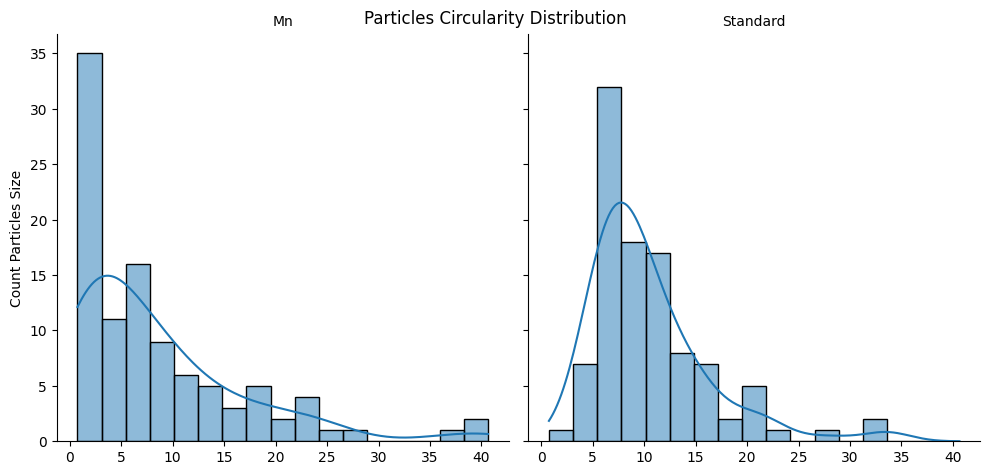

In [21]:
g=sns.displot(
    data=df,
    x="Height",
    # log_scale=True,
    col="Type",
    # kind="bar"
    kde=True,
)
g.set_axis_labels("", "Count Particles Size")
# g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name}")
# g.set(xlim=(0))
g.figure.suptitle("Particles Circularity Distribution")
plt.show()

#Statistical Analysis

In [22]:
#Return The Column Name
df.columns
columns = ['Area', 'Perim.', 'Circ.', 'Round', 'Solidity', 'Width', 'Height']

##Normal Distribution Test

In [43]:
norm_std_result=[]
norm_mn_result=[]
next_result=[]
for x in columns:
  a = ks_1samp(df[df["Type"]=="Standard"][x],stats.norm.cdf)
  b = ks_1samp(df[df["Type"]=="Mn"][x],stats.norm.cdf)
  norm_std_result.append(a)
  norm_mn_result.append(b)
  next_result.append("t-Test" if a.pvalue > 0.05 and b.pvalue > 0.05 else "Mann-Whitney U Test")
  print(f"{x} p-value\nStandard: {a.pvalue}\nMn: {b.pvalue}")
  print(f"Next Analysis:","t-Test" if a.pvalue > 0.05 and b.pvalue > 0.05 else "Mann-Whitney U Test","\n")


Area p-value
Standard: 0.0
Mn: 5.837819923547569e-66
Next Analysis: Mann-Whitney U Test 

Perim. p-value
Standard: 0.0
Mn: 4.0482261606361524e-191
Next Analysis: Mann-Whitney U Test 

Circ. p-value
Standard: 5.23003716567352e-29
Mn: 3.460441790058171e-29
Next Analysis: Mann-Whitney U Test 

Round p-value
Standard: 7.178002089494222e-30
Mn: 7.436949574283979e-33
Next Analysis: Mann-Whitney U Test 

Solidity p-value
Standard: 2.6108937916716157e-42
Mn: 4.098809273923218e-52
Next Analysis: Mann-Whitney U Test 

Width p-value
Standard: 1.3448160160033757e-261
Mn: 2.3446610186199476e-70
Next Analysis: Mann-Whitney U Test 

Height p-value
Standard: 1.3448160160033757e-261
Mn: 7.175174219267084e-74
Next Analysis: Mann-Whitney U Test 



###Mann-Whitney U Test

In [51]:
utest_result=[]
conclusion=[]
for x in columns:
  a = df[df["Type"]=="Standard"][x]
  b = df[df["Type"]=="Mn"][x]
  c=mannwhitneyu(a,b)
  utest_result.append(c)
  conclusion.append("Significantly different" if c.pvalue <0.05 else "Unsignificantly different")
  # print(f"{x} p-value: {c.pvalue}")
  # print("There is significant different" if c.pvalue <0.05 else "There is no significant different","\n")

Area p-value: 0.0011939844660138197
There is significant different 

Perim. p-value: 0.0010975232805348842
There is significant different 

Circ. p-value: 0.0016601131057153954
There is significant different 

Round p-value: 0.00013457037066909788
There is significant different 

Solidity p-value: 4.842530607904573e-12
There is significant different 

Width p-value: 7.215012648186213e-05
There is significant different 

Height p-value: 0.00016546951295369207
There is significant different 



,variable,statistic,pvalue,result
0,Area,6447.0,1.193984e-03,Significantly different
1,Perim.,6457.0,1.097523e-03,Significantly different
2,Circ.,3793.5,1.660113e-03,Significantly different
3,Round,3514.0,1.345704e-04,Significantly different
4,Solidity,2229.5,4.842531e-12,Significantly different
5,Width,6749.0,7.215013e-05,Significantly different
6,Height,6665.0,1.654695e-04,Significantly different


##Conclusion

In [57]:
pd.DataFrame(
    {
        "variable":columns,
        "statistic_std":[x.statistic for x in norm_std_result],
        "pvalue_std":[x.pvalue for x in norm_std_result],
        "statistic_Mn":[x.statistic for x in norm_mn_result],
        "pvalue_Mn":[x.pvalue for x in norm_mn_result],
        "test type":next_result,
        # "variable":columns,
        "statistic":[x.statistic for x in utest_result],
        "pvalue":[x.pvalue for x in utest_result],
        "conclusion":conclusion
    }
)

,variable,statistic_std,pvalue_std,statistic_Mn,pvalue_Mn,test type,statistic,pvalue,conclusion
0,Area,1.000000,0.000000e+00,0.781981,5.837820e-66,Mann-Whitney U Test,6447.0,1.193984e-03,Significantly different
1,Perim.,1.000000,0.000000e+00,0.987060,4.048226e-191,Mann-Whitney U Test,6457.0,1.097523e-03,Significantly different
2,Circ.,0.548138,5.230037e-29,0.549717,3.460442e-29,Mann-Whitney U Test,3793.5,1.660113e-03,Significantly different
3,Round,0.555670,7.178002e-30,0.580665,7.436950e-33,Mann-Whitney U Test,3514.0,1.345704e-04,Significantly different
4,Solidity,0.650622,2.610894e-42,0.711497,4.098809e-52,Mann-Whitney U Test,2229.5,4.842531e-12,Significantly different
5,Width,0.997405,1.344816e-261,0.801149,2.344661e-70,Mann-Whitney U Test,6749.0,7.215013e-05,Significantly different
6,Height,0.997405,1.344816e-261,0.815462,7.175174e-74,Mann-Whitney U Test,6665.0,1.654695e-04,Significantly different
